In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import sympy

In [2]:
t = np.linspace(0,40000,40001)
α1=-1/60.5161
α2=-1/(1019.19+2152.2j)
α3=-1/(1019.19-2152.2j)

/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


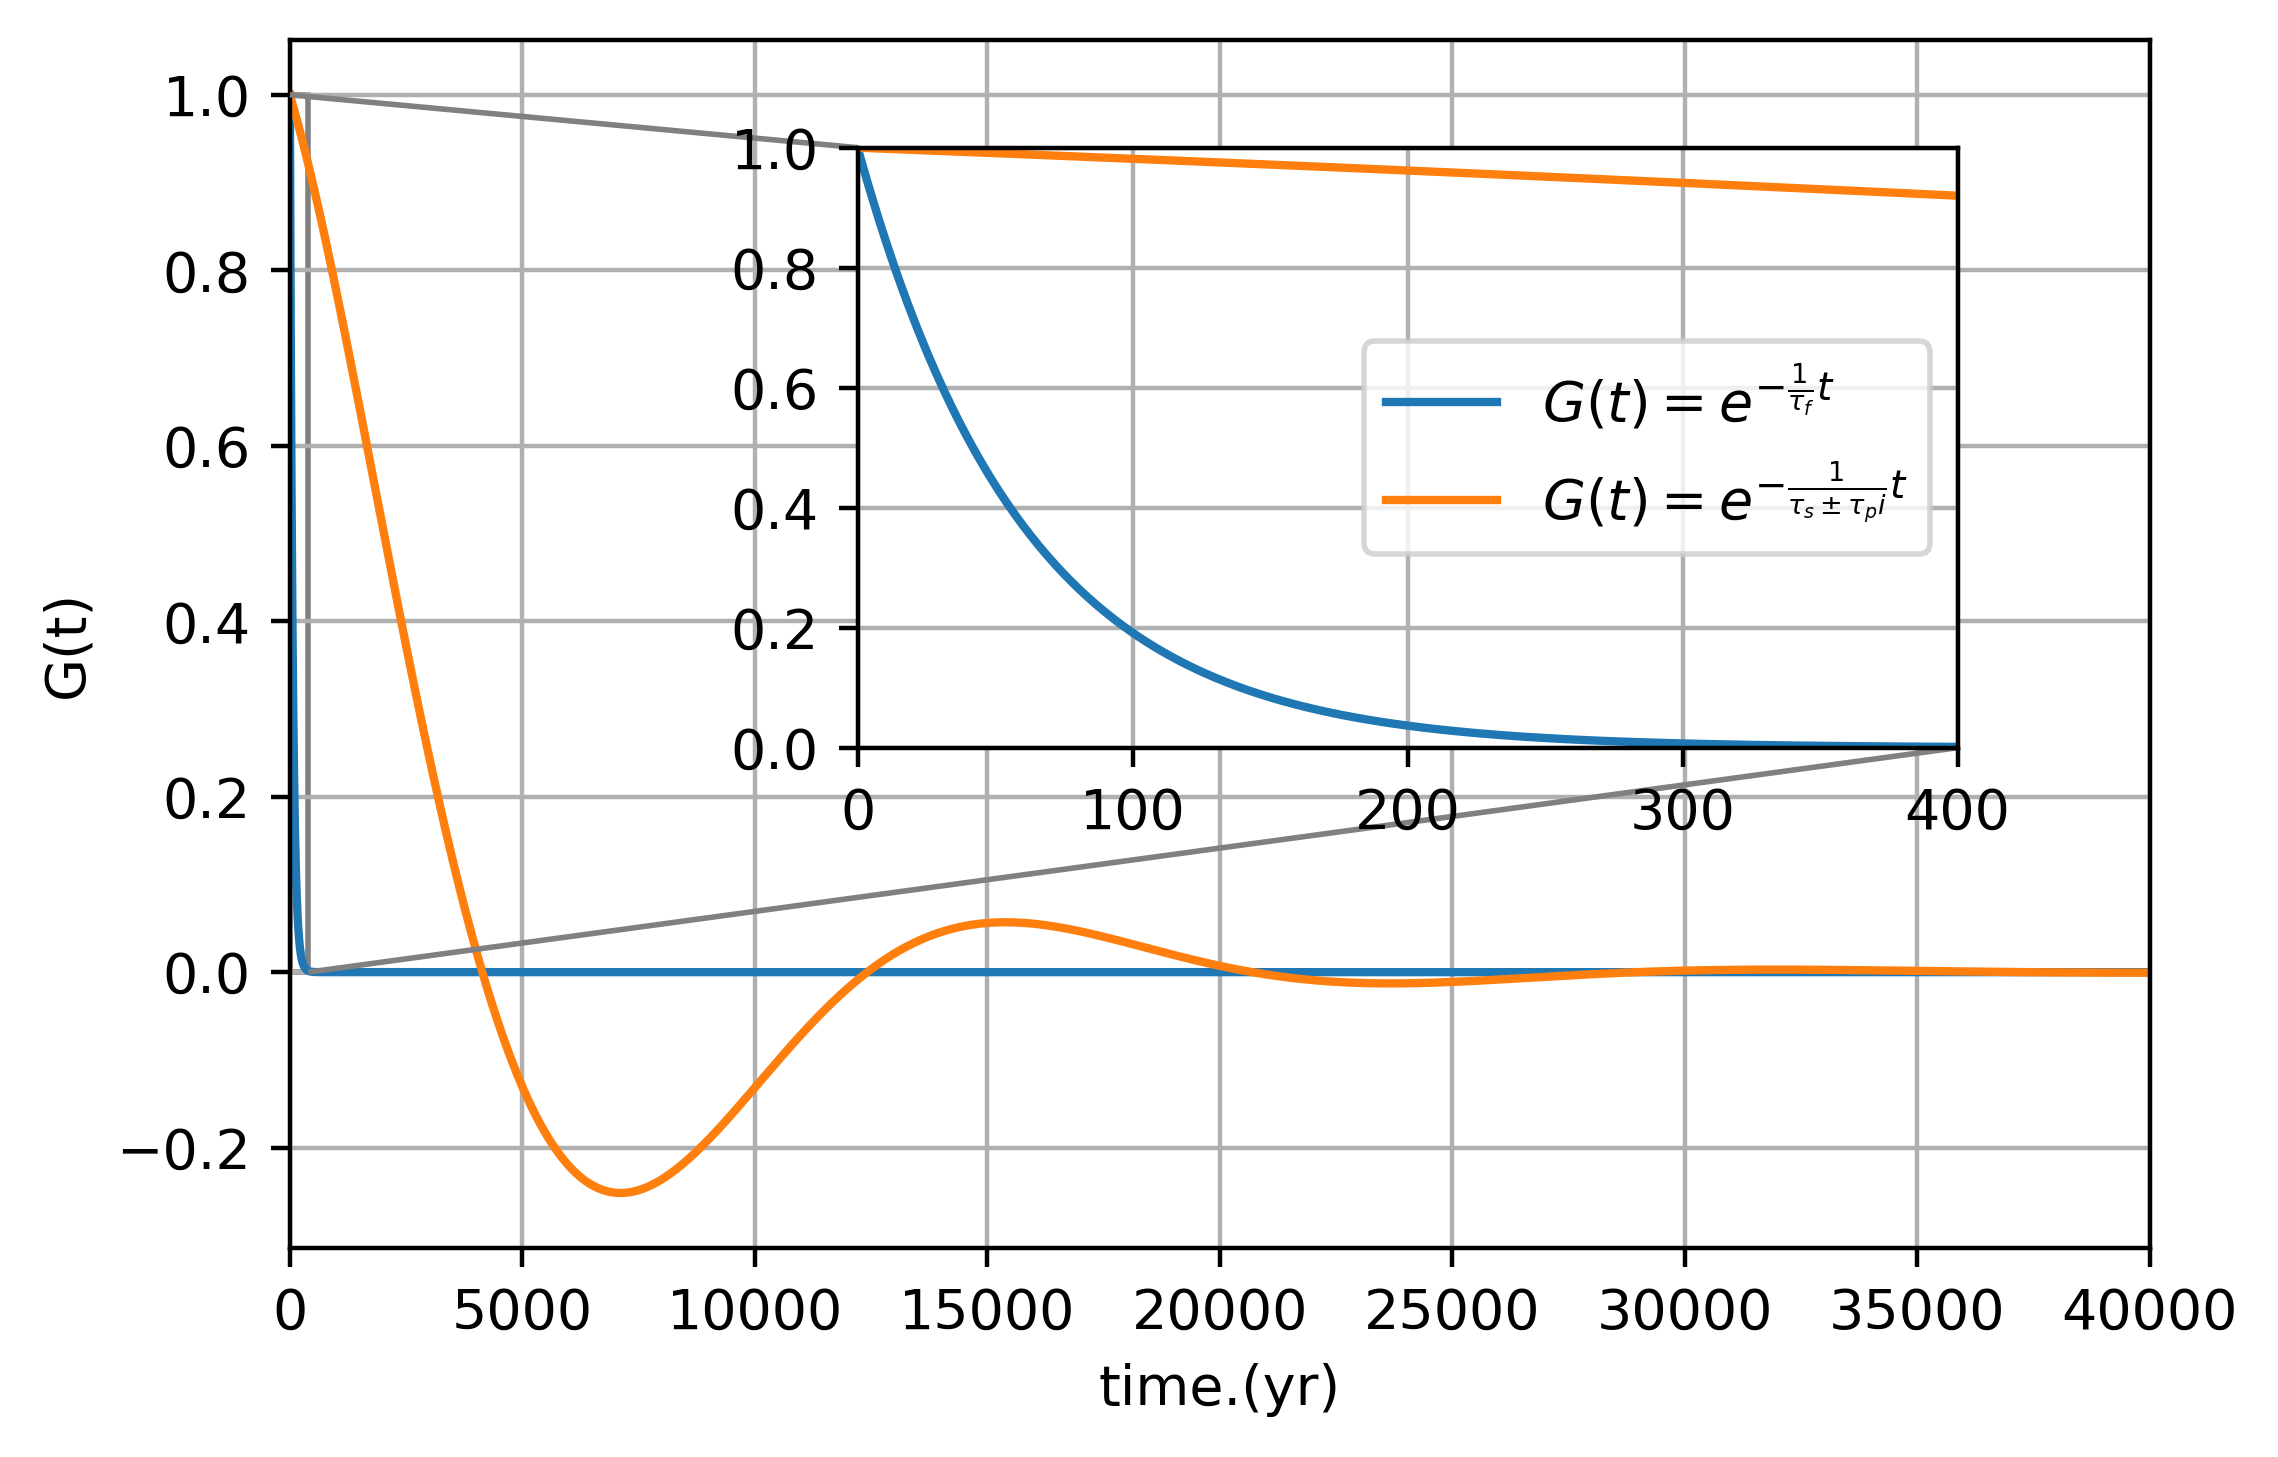

In [201]:
fig1 = plt.figure(dpi=400)
ax1 = fig1.add_subplot(111)
ax1.plot(t,np.exp(α1*t))
ax1.plot(t,np.exp(α2*t))
plt.xlim(0,40000)
plt.xlabel('time.(yr)')
plt.ylabel('G(t)')
plt.grid()

ax2 = inset_axes(ax1, 2.75,1.5 , loc=2,bbox_to_anchor=(.35, 0.83),bbox_transform=ax1.figure.transFigure) # no zoom
ax2.plot(t,np.exp(α1*t),label=r'$G(t) = e^{-\frac{1}{\tau_f} t}$')
ax2.plot(t,np.exp(α2*t),label=r'$G(t) = e^{-\frac{1}{\tau_s \pm \tau_pi}t}$')
ax2.legend()
# clabel(C,fontsize=14,fmt='%2.1f')#,manual=True)
# subregion of the original image
x1,x2,y1,y2 = 0,400,0,1
ax2.set_xlim(x1,x2)
ax2.set_ylim(y1,y2)
#plt.xticks(visible=False)

ax2.yaxis.get_major_locator().set_params(nbins=7)
ax2.xaxis.get_major_locator().set_params(nbins=7)

plt.setp(ax2.get_xticklabels(),visible=True)#, visible=False)
plt.setp(ax2.get_yticklabels(),visible=True)#, visible=False)
# draw a bbox of the region of the inset axes in the parent axes and
# connecting lines between the bbox and the inset axes area
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec="0.5")
plt.grid()
plt.draw()
plt.show()

In [39]:
from scipy.io import loadmat

In [170]:
datagl=loadmat('/Users/andrew/Downloads/GL_bedrock.mat')
datagl_nobed = loadmat('/Users/andrew/Downloads/GL_no_bedrock.mat')
datasmb=loadmat('/Users/andrew/Downloads/SMB_bedrock.mat')
datasmb_nobed=loadmat('/Users/andrew/Downloads/SMB_no_bedrock.mat')

Text(0.5, 0, 'time.(yr)')

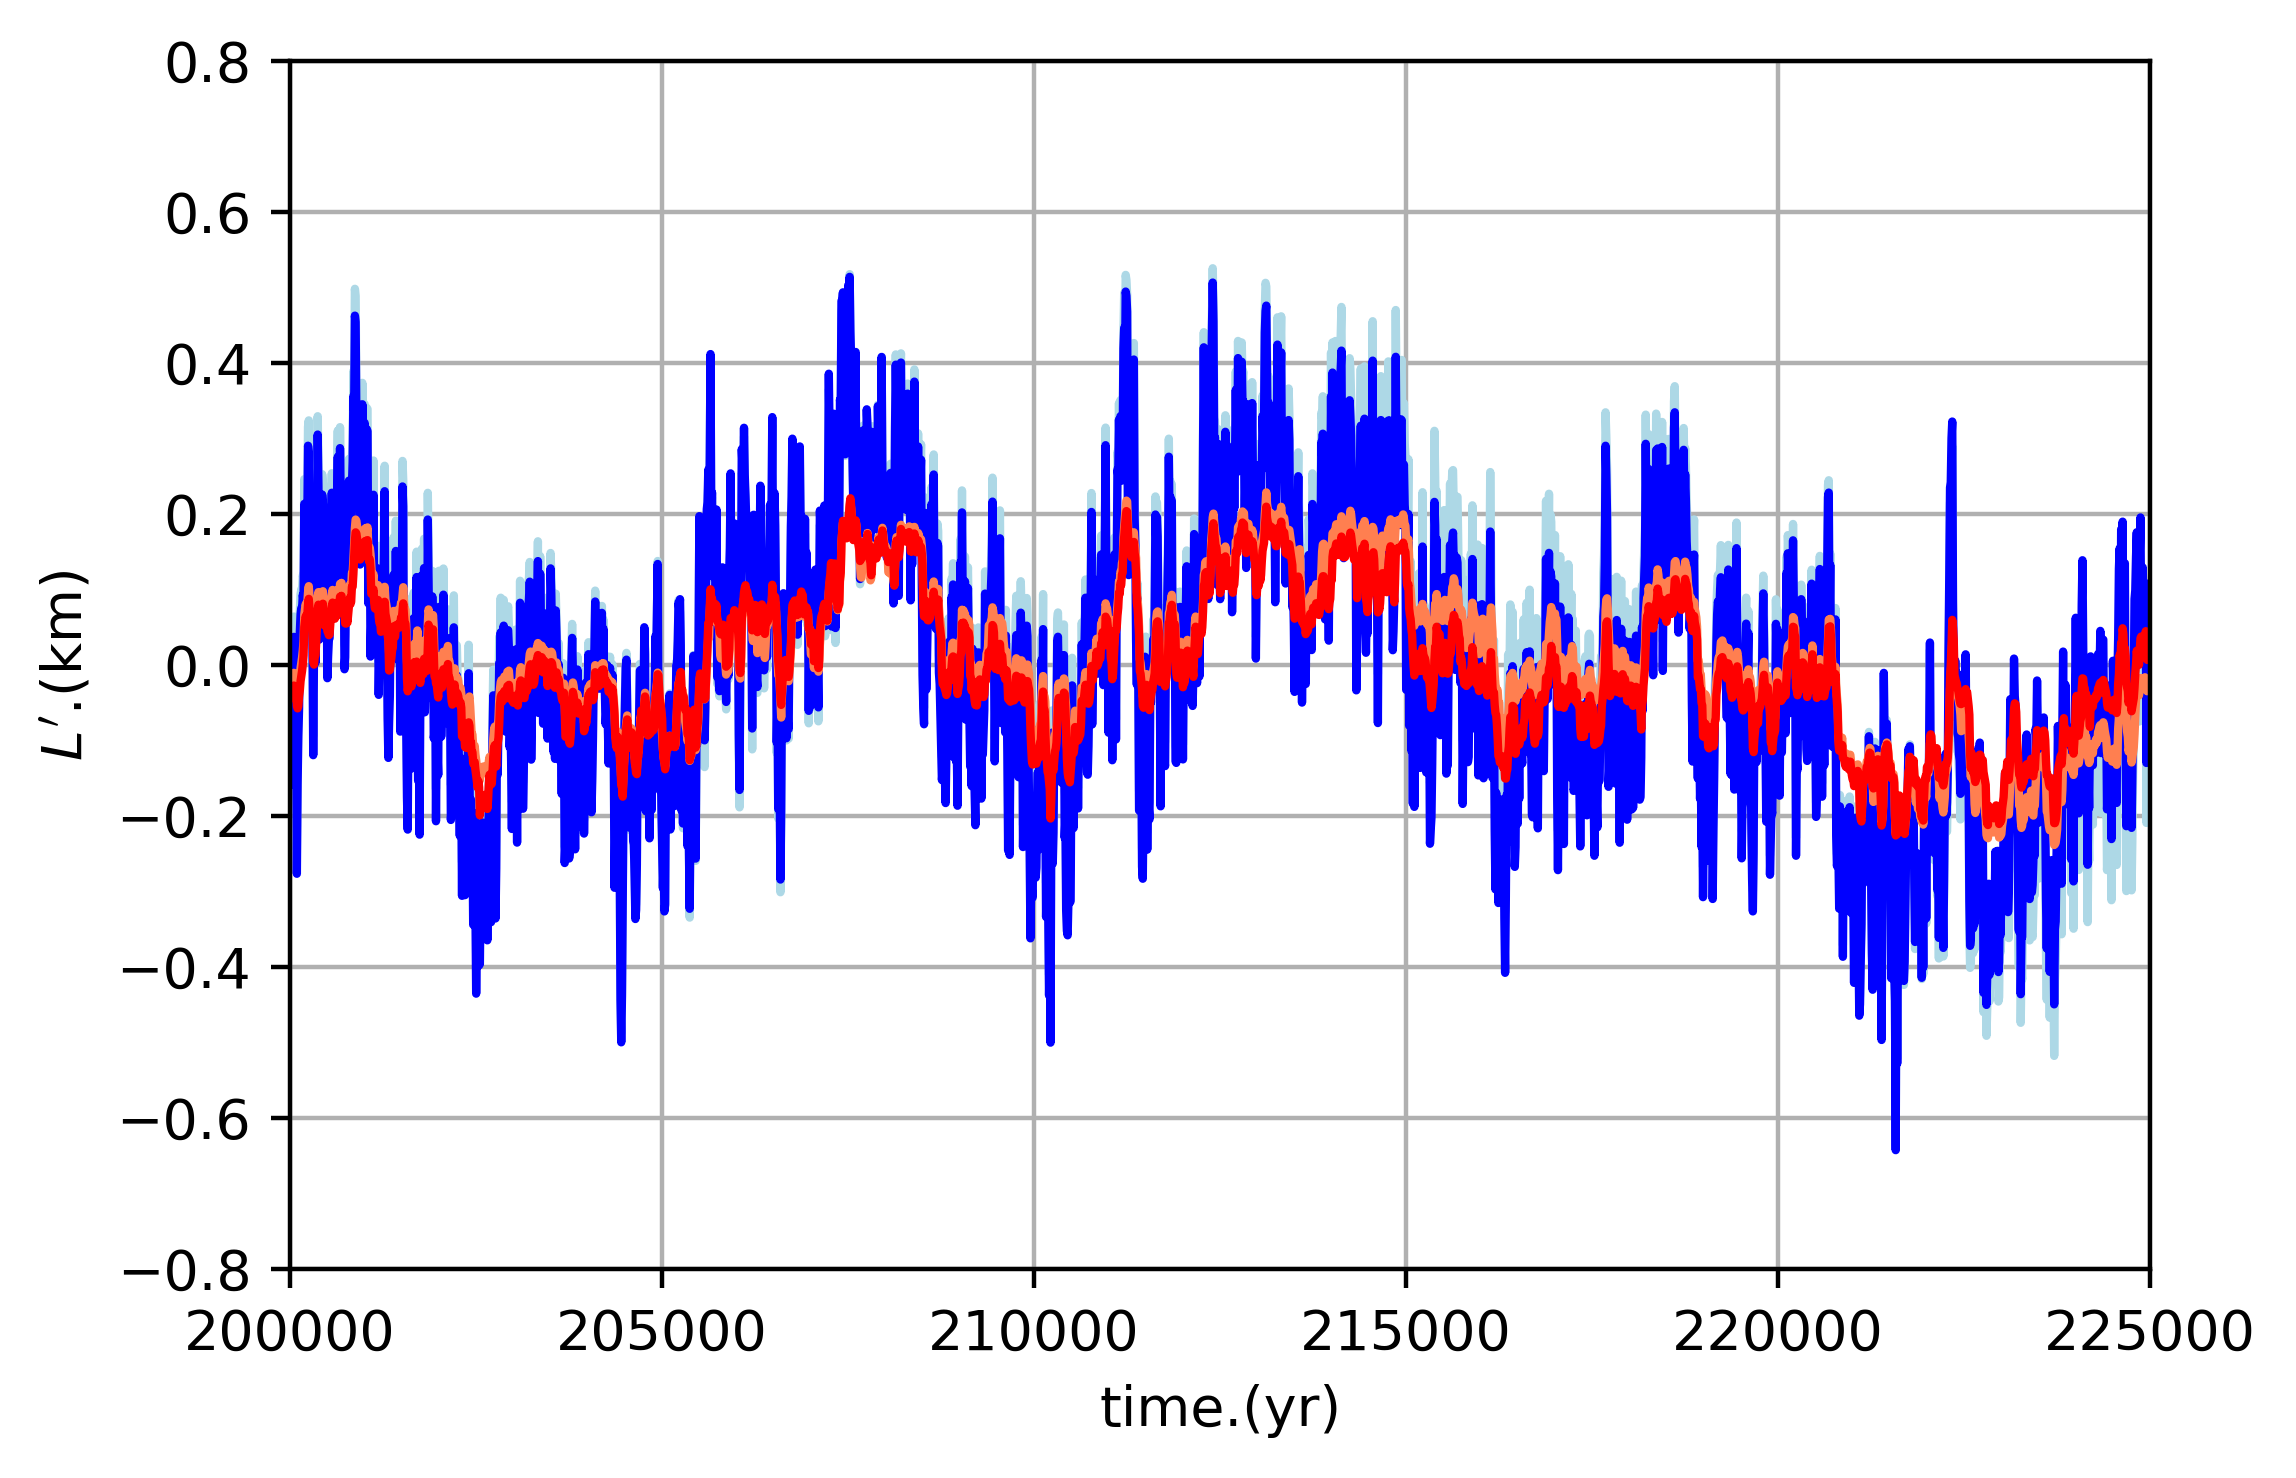

In [202]:
fig1 = plt.figure(dpi=400)
ax1 = fig1.add_subplot(111)
ax1.plot(datagl_nobed['time'].squeeze(),datagl_nobed['gl'].squeeze()-np.mean(datagl_nobed['gl'].squeeze()[10000:]),'lightblue')
ax1.plot(datagl['time'].squeeze(),datagl['gl'].squeeze()-np.mean(datagl['gl'].squeeze()[10000:]),'blue')
ax1.plot(datasmb_nobed['time'].squeeze(),datasmb_nobed['gl'].squeeze()-np.mean(datasmb_nobed['gl'].squeeze()[10000:]),'coral')
ax1.plot(datasmb['time'].squeeze(),datasmb['gl'].squeeze()-np.mean(datasmb['gl'].squeeze()[10000:]),'red')
ax1.set_xlim(200000,225000)
ax1.set_ylim(-.8,.8)
ax1.grid(True)
ax1.set_ylabel(r"$L'$.(km)")
ax1.set_xlabel("time.(yr)")

In [173]:
datagl_nobed['gl'].shape

(1, 100001)

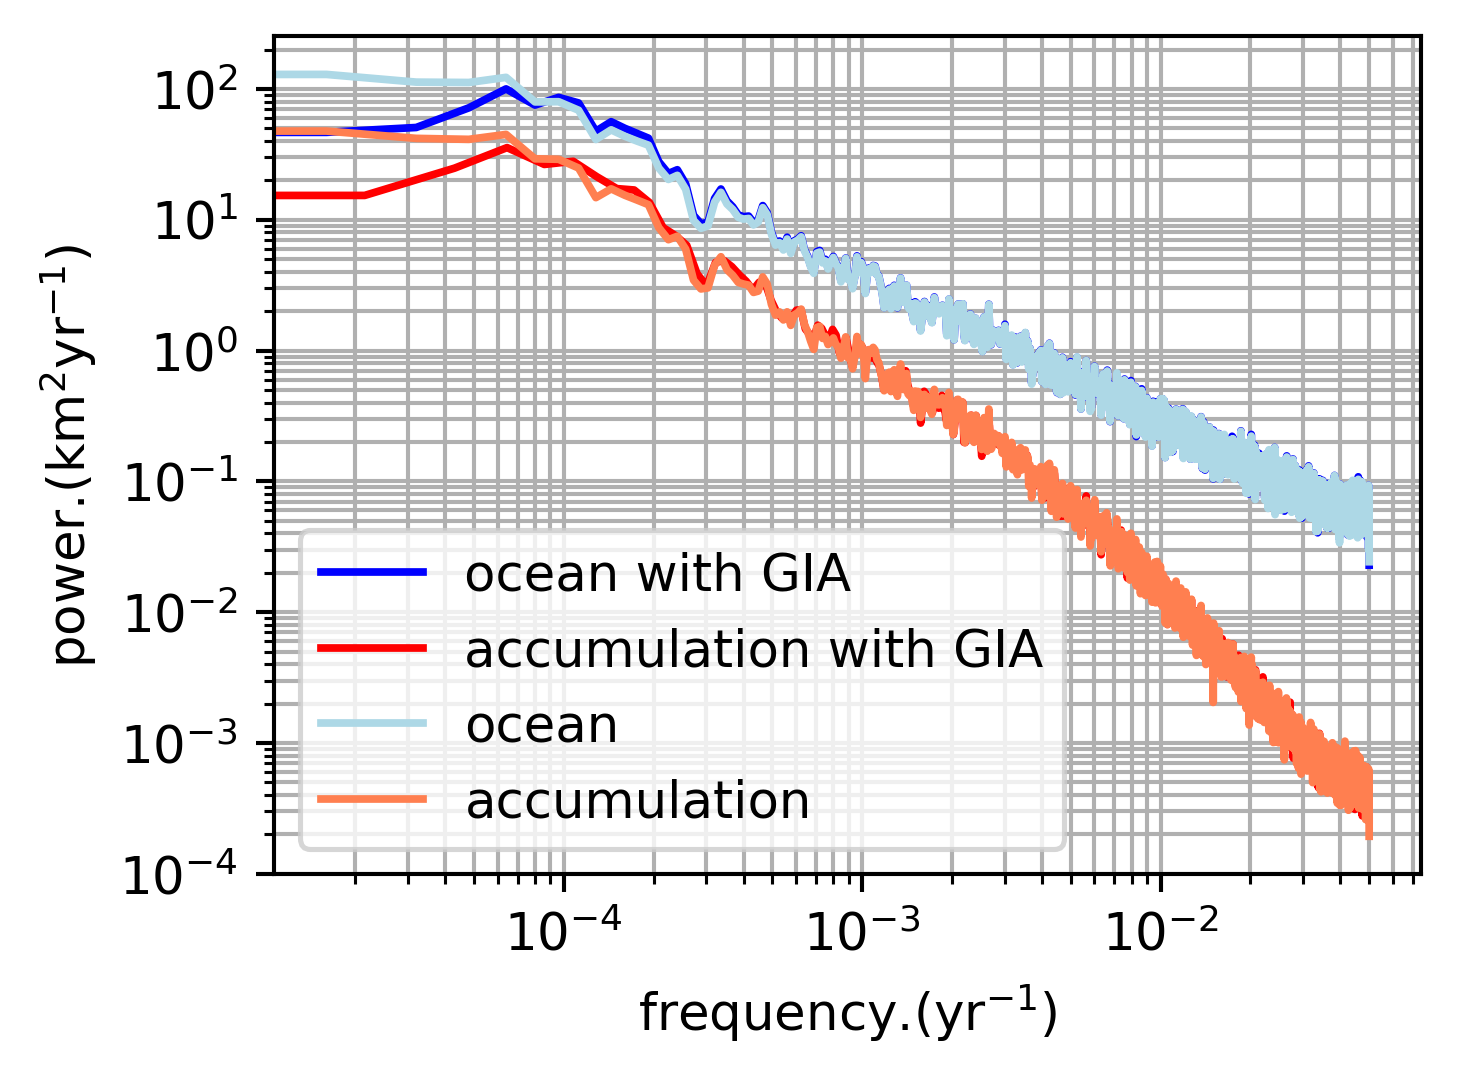

In [179]:
from scipy import signal
dt=10
N=100001
w = 4
h = 3
d = 370
fig,ax=plt.subplots(figsize=(w, h), dpi=d)

freqsO, psdO = signal.welch(datagl['gl'].squeeze()[:],1/dt,'hanning', N/16)
line1=plt.loglog(freqsO,psdO,'blue', label='ocean with GIA')

freqsSMB, psdSMB = signal.welch(datasmb['gl'].squeeze()[:],1/dt,'hanning', N2/16)
line2=plt.loglog(freqsSMB,psdSMB,'red', label='accumulation with GIA')

freqsO_nobed, psdO_nobed = signal.welch(datagl_nobed['gl'].squeeze(),1/dt,'hanning', N/16)
line3=plt.loglog(freqsO_nobed,psdO_nobed,'lightblue',label='ocean')

freqsSMB_nobed, psdSMB_nobed = signal.welch(datasmb_nobed['gl'].squeeze(),1/dt,'hanning', N/16)
line4=plt.loglog(freqsSMB_nobed,psdSMB_nobed,'coral',label='accumulation')


ax.legend()
plt.ylabel(r"power.(km$^2$yr$^{-1}$)")
plt.xlabel(r"frequency.(yr$^{-1}$)")
plt.grid(True, which="both")
plt.show()

In [204]:
profile=loadmat('/Users/andrew/Downloads/glacier_geometry.mat')

Text(0.5, 0, 'X.(km)')

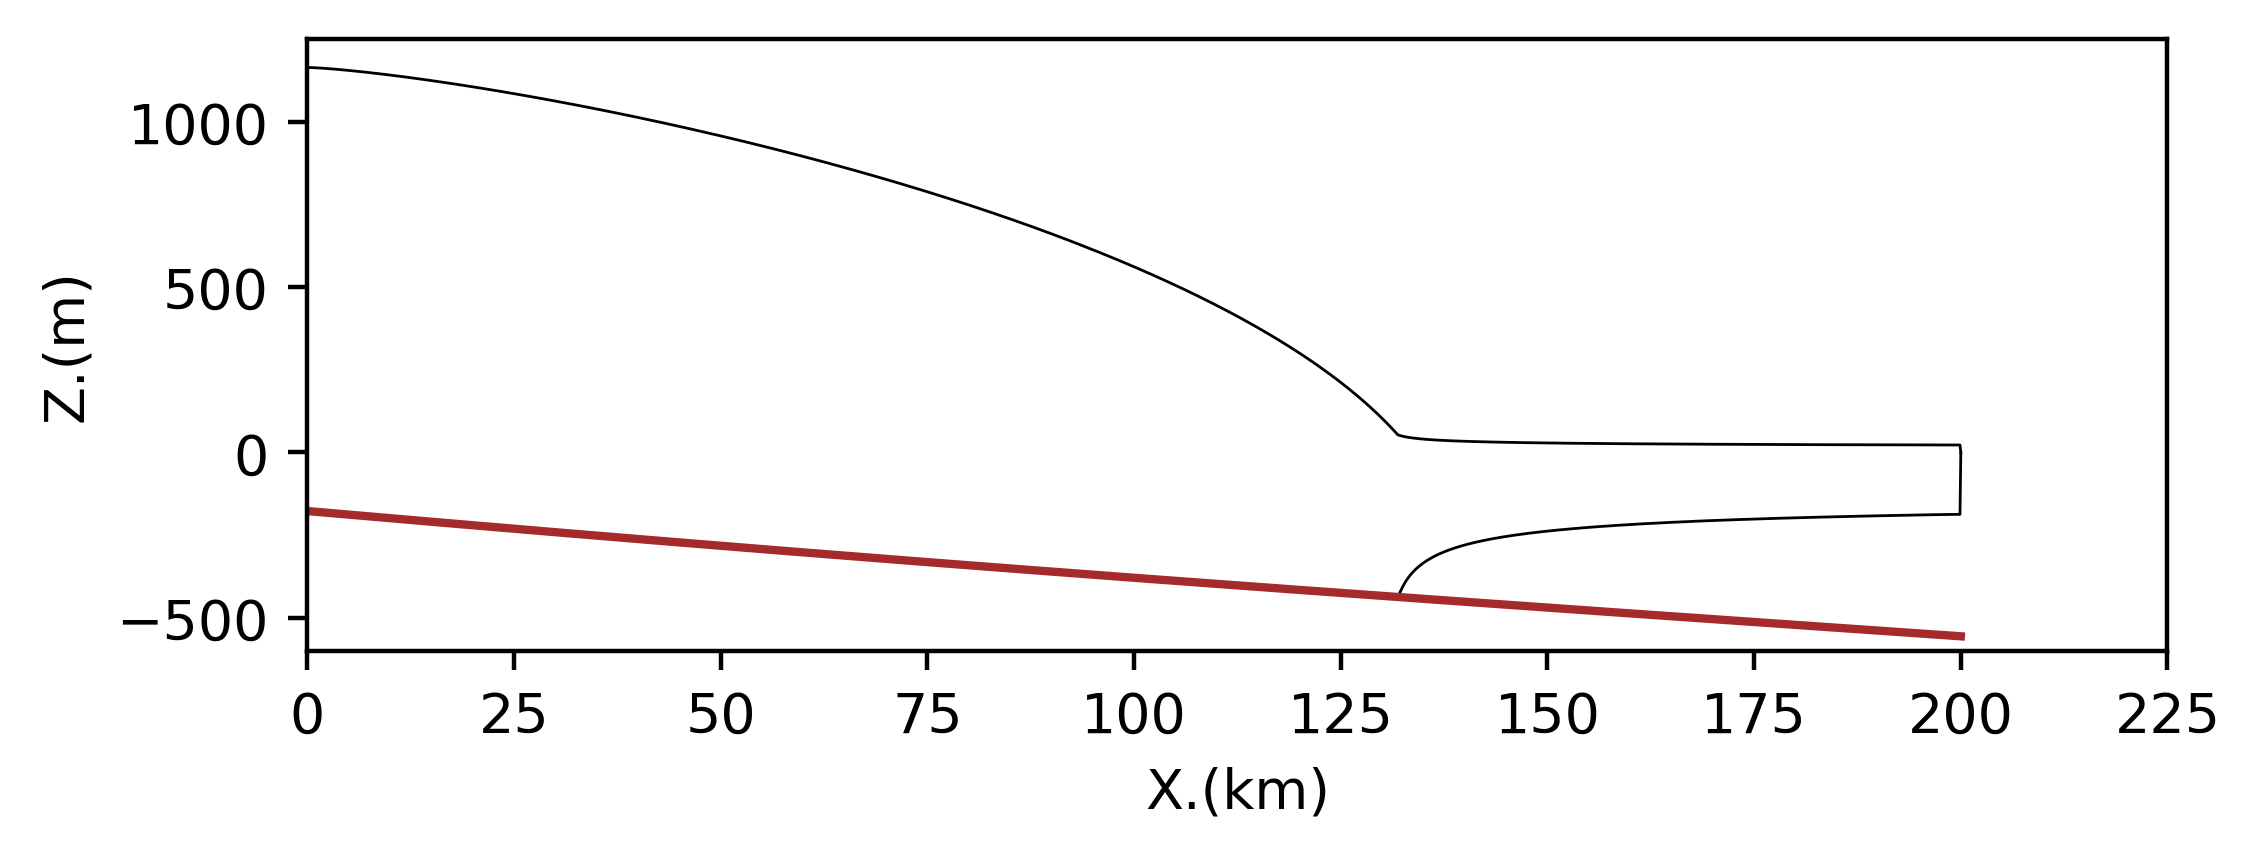

In [232]:
fig1 = plt.figure(dpi=400)
ax1 = fig1.add_subplot(111)
ax1.plot(profile['x0'].squeeze(),profile['hs'].squeeze(),'k',linewidth=.5)
ax1.plot(profile['x0'].squeeze(),profile['hs'].squeeze()-profile['h'].squeeze(),'k',linewidth=.5)
ax1.plot(profile['x0'].squeeze(),profile['hb'].squeeze(),'brown')
ax1.set_aspect(aspect=1/25)
ax1.set_xlim(0,225)
ax1.set_ylim(-600,1250)
ax1.set_ylabel("Z.(m)")
ax1.set_xlabel("X.(km)")